# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [79]:
import pandas as pd
data = pd.read_csv('spam_or_not_spam.zip')
data.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [80]:
data_count = data.groupby('label').count()

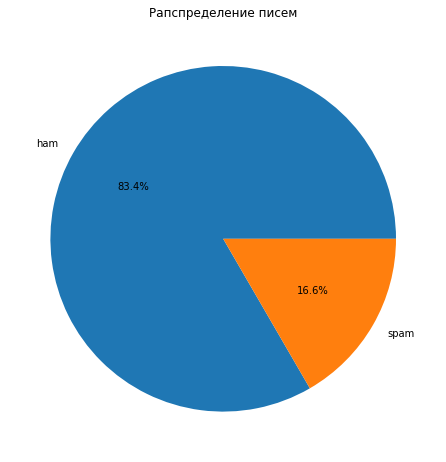

In [81]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6, 6))
ax = fig.add_axes((1, 1, 1, 1))
pie = plt.pie(data_count['email'],
        labels=['ham', 'spam'],
        autopct='%1.1f%%'
        )
ax.set_title('Рапспределение писем');

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [82]:
from sklearn.feature_extraction.text import CountVectorizer

Замените в данных все пустые строки и строки, состоящие из пробелов, на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [83]:
import numpy as np

print('Размер до очистки: ', data.shape)
data['email'] = data['email'].replace(r'^\s*$', np.NaN, regex=True)

data = data.dropna()

print('Размер после очистки: ', data.shape)

Размер до очистки:  (3000, 2)
Размер после очистки:  (2997, 2)


Переводим данные в векторный вид:

In [84]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data["email"])

Определите, сколько теперь признаков в нашем наборе данных:

In [85]:
X.shape[1]

34116

## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [86]:
y = data['label']

Разделите выборку на обучающую и тестовую, размер тестовой выборки возьмите как 0.25, параметр random_state определите со значением 42:

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [88]:
y_test.mean()

0.17733333333333334

## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [89]:
import sklearn
from sklearn import naive_bayes

In [90]:
alg = sklearn.naive_bayes.ComplementNB(alpha=0.01)
alg.fit(X_train, y_train)
y_pred = alg.predict(X_test)

Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [91]:
from sklearn import metrics

#Рассчитываем accuracy
print('Accuracy: {:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
#Рассчитываем precision
print('Precision: {:.3f}'.format(metrics.precision_score(y_test, y_pred)))
#Рассчитываем recall
print('Recall: {:.3f}'.format(metrics.recall_score(y_test, y_pred)))
#Рассчитываем F1-меру
print('F1 score: {:.3f}'.format(metrics.f1_score(y_test, y_pred)))

Accuracy: 0.991
Precision: 0.977
Recall: 0.970
F1 score: 0.974


Нарисуйте ROC-кривую:

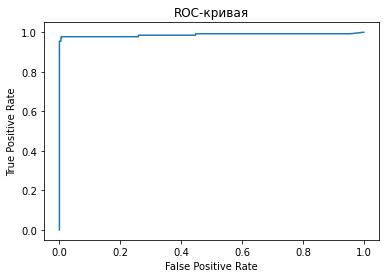

In [92]:
y_pred_proba = alg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

plt.plot (fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC-кривая')
plt.show()

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [93]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': list(np.linspace(0, 1, 101))}

grid_search_1 = GridSearchCV(
    estimator=sklearn.naive_bayes.ComplementNB(), 
    param_grid=param_grid, 
    cv=5, 
    n_jobs = -1
)  
 
grid_search_1.fit(X_train, y_train) 
print("Accuracy на тестовом наборе: {:.3f}".format(grid_search_1.score(X_test, y_test)))
y_test_pred = grid_search_1.predict(X_test)
print('Precision на тестовом наборе: {:.3f}'.format(metrics.precision_score(y_test, y_test_pred)))
print('Recall на тестовом наборе: {:.3f}'.format(metrics.recall_score(y_test, y_test_pred)))
print('F1 score на тестовом наборе: {:.3f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(grid_search_1.best_params_))
 


Accuracy на тестовом наборе: 0.991
Precision на тестовом наборе: 0.977
Recall на тестовом наборе: 0.970
F1 score на тестовом наборе: 0.974
Наилучшие значения гиперпараметров: {'alpha': 0.07}
